#Wine Type Classifier (Red/White)

The purpose of this project is to exercise model selection and optimization for classification as well as some simple variable exploration methods. In this notebook, I have joined two datasets with characteristics of wine to run a classification model that will determine whether a wine is red or white. 

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

###Importing and Data Prep

The white wines dataset and red wine dataset have been joined/coded so that red wines = 1, and white wines = 0. 

In [75]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red['winetype'] = 1
white['winetype'] = 0
both = white.append(red)

#checking new dataframe label counts
print(both["winetype"].value_counts())

0    4898
1    1599
Name: winetype, dtype: int64


The data is highly unbalanced. There are about 3 times as many white wines as there are red wines. Therefore, we must resample to the shape of redwine data the white wines data so that we do not overfit our models later on.

In [76]:
white = white.sample(red.shape[0])
both = white.append(red, ignore_index=True)
print(both["winetype"].value_counts())

0    1599
1    1599
Name: winetype, dtype: int64


### Variable Exploration

In [77]:
print(both.head())
print(red.describe())
print(white.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.2              0.35         0.20            18.1      0.069   
1            7.6              0.27         0.52             3.2      0.043   
2            7.2              0.08         0.49             1.3      0.050   
3            6.1              0.19         0.37             2.6      0.041   
4            6.3              0.35         0.30             5.7      0.035   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 33.0                 158.0  0.99908  3.15       0.50   
1                 28.0                 152.0  0.99129  3.02       0.53   
2                 18.0                 148.0  0.99450  3.46       0.44   
3                 24.0                  99.0  0.99153  3.18       0.50   
4                  8.0                  97.0  0.99270  3.27       0.41   

   alcohol  quality  winetype  
0      8.8        6         0  
1     11.4        6   

The univariate distributions below are to show a general sense of how wines are distributed in attributes such as volatile acidity, pH level, and free sulfur dioxide.

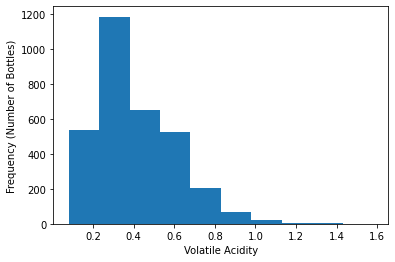

In [78]:
plt.hist(both['volatile acidity'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency (Number of Bottles)')
plt.show()

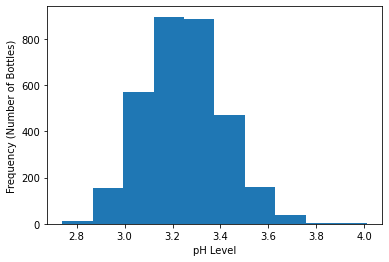

In [79]:
plt.hist(both['pH'])
plt.xlabel('pH Level')
plt.ylabel('Frequency (Number of Bottles)')
plt.show()

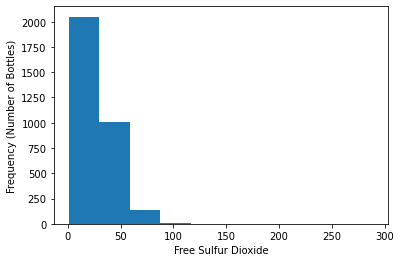

In [80]:
plt.hist(both['free sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency (Number of Bottles)')
plt.show()

Correlation Matrix of independent variables

This figure shows that there are greater correlations between certain chemical attributes of wine.

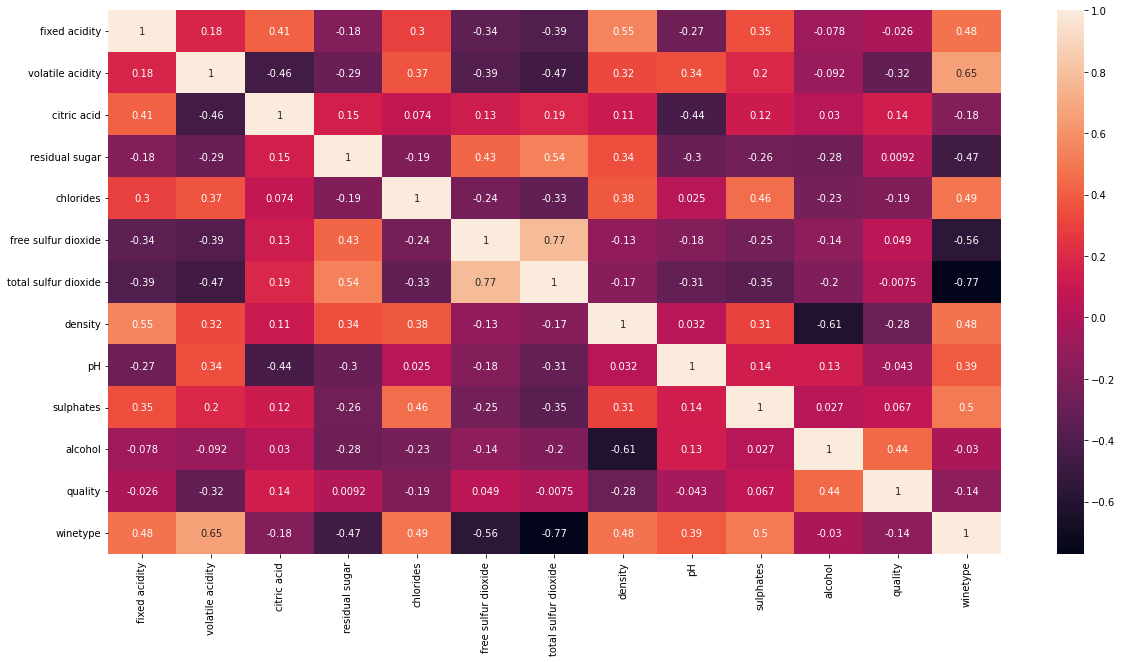

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize= (20, 10))
sns.heatmap(both.corr(),annot= True)

### Preparation, Splitting, Preprocessing

The below code separates labels (y data) from the dataset, splits our original dataset into training and test, and preprocesses data.

In [82]:
y = both['winetype']
n_both = both.drop('winetype', 1)
x = n_both

#y data should only have binary values 0 or 1
print(y)

#checking to make sure winetype has been properly removed
x.head()

0       0
1       0
2       0
3       0
4       0
       ..
3193    1
3194    1
3195    1
3196    1
3197    1
Name: winetype, Length: 3198, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.35,0.20,18.1,0.069,33.0,158.0,0.99908,3.15,0.50,8.8,6
1,7.6,0.27,0.52,3.2,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
2,7.2,0.08,0.49,1.3,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6
3,6.1,0.19,0.37,2.6,0.041,24.0,99.0,0.99153,3.18,0.50,10.9,6
4,6.3,0.35,0.30,5.7,0.035,8.0,97.0,0.99270,3.27,0.41,11.0,7


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)

print(x.shape)
x_train.shape #75% used for training

(3198, 12)


(2398, 12)

In [84]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)  
x_test_scaled = scaler.transform(x_test)

### Modeling
The following classification models have been examined for this classification problem:

1. Logistic Regression
2. Penalized Logistic Regression (L2 regularization)
3. Random Forest Classifier
4. Support Vector Machine (Classifer)

**Logistic regression**

In [85]:
from sklearn.linear_model import LogisticRegression

#logistic regression no penalty
logreg = LogisticRegression(penalty='none', max_iter=1000, solver='lbfgs').fit(x_train_scaled, y_train)

#examine coefficient magnitudes
print("logreg .coef_: {}".format(logreg.coef_))

print("Training set score: {:.3f}".format(logreg.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test_scaled, y_test)))



logreg .coef_: [[-1.86392158  0.83423893 -0.27076941 -4.46248467  1.2630858   0.17227847
  -2.74712118  7.76593779 -0.68558608 -0.22924685  3.70777301  0.59445444]]
Training set score: 0.994
Test set score: 0.991


In [86]:
from sklearn.metrics import classification_report

#model metrics
predicted_vals = logreg.predict(x_test) 
print(classification_report(y_test,predicted_vals))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       396
           1       1.00      0.01      0.03       404

    accuracy                           0.50       800
   macro avg       0.75      0.51      0.35       800
weighted avg       0.75      0.50      0.34       800



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Penalized logistic regression (L2)**

In [87]:
#logistic regression l2 penalty
logreg1 = LogisticRegression(C=100, penalty='l2', max_iter=10000).fit(x_train, y_train)

print("logreg .coef_: {}".format(logreg1.coef_))

print("Training set score: {:.3f}".format(logreg1.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(x_test, y_test)))


logreg .coef_: [[ 1.08444982e+00  1.13080895e+01 -5.50923685e-01 -6.32807291e-02
   3.36026679e+01  1.98947118e-02 -5.45255402e-02  5.33112583e+00
   7.98733464e+00  9.75248820e+00 -2.91447330e-01  8.54550523e-02]]
Training set score: 0.988
Test set score: 0.986


In [88]:
param_grid = {'C' : np.logspace(-3, 3, 10,10)}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10)
grid.fit(x_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(x_test, y_test)))

predicted_vals = grid.predict(x_test)

best mean cross-validation score: 0.987
best parameters: {'C': 215.44346900318823}
test-set score: 0.985


In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted_vals))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       396
           1       0.99      0.98      0.98       404

    accuracy                           0.98       800
   macro avg       0.99      0.99      0.98       800
weighted avg       0.99      0.98      0.98       800



**K-Neighbors Classifier**

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) #5 is default
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

print("Training set score: {:.3f}".format(logreg1.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(x_test, y_test)))
y_pred = knn.predict(x_test)

0.90625
Training set score: 0.988
Test set score: 0.986


Let's run our models again, but see how scaled data affects their performance

In [91]:
#fitting again for scaled data
logreg = LogisticRegression(penalty='none', max_iter=10000).fit(x_train_scaled, y_train)
logreg1 = LogisticRegression(C=100,penalty='l2', max_iter=10000).fit(x_train_scaled, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train_scaled, y_train)

In [92]:
#cv scores

#logistic regression
print("Training set score: {:.3f}".format(logreg.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test_scaled, y_test)))

#penalized logistic regression
print("Training set score: {:.3f}".format(logreg1.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(x_test_scaled, y_test)))

#Knn
print("Training set score: {:.3f}".format(knn.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn.score(x_test_scaled, y_test)))

Training set score: 0.994
Test set score: 0.991
Training set score: 0.994
Test set score: 0.991
Training set score: 0.992
Test set score: 0.988


#### Model Optimization 
Now that we see how scaled data dramatically improves our model, lets try tuning the parameters where possible using GridSearchCV. Do the results improve?



Using Kfold (k=10) cross validation, what are the best results from doing a grid search?



In [93]:
param_grid = {'C' : np.logspace(-3, 3, 10,10)} 

grid1 = GridSearchCV(LogisticRegression(max_iter=10000, penalty="l2"), param_grid, cv=10)
grid1.fit(x_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))
print("test-set score: {:.3f}".format(grid1.score(x_test_scaled, y_test)))

best mean cross-validation score: 0.992
best parameters: {'C': 0.1}
test-set score: 0.989


In [94]:
param_grid = {'n_neighbors' : range(3, 13, 2)}
grid2 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid2.fit(x_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))
print("test-set score: {:.3f}".format(grid2.score(x_test_scaled, y_test)))

best mean cross-validation score: 0.990
best parameters: {'n_neighbors': 11}
test-set score: 0.989


Using GridSearchCV again, but this time changing the cross-validation strategy from ‘kfold’ to ‘stratified kfold’. 

Additionally: Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [95]:
param_grid = {'C' : np.logspace(-3, 3, 10,10)} 

grid3 = GridSearchCV(LogisticRegression(max_iter=10000, penalty="l2"), param_grid, cv=StratifiedKFold())
grid3.fit(x_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))
print("test-set score: {:.3f}".format(grid3.score(x_test_scaled, y_test)))

best mean cross-validation score: 0.993
best parameters: {'C': 0.46415888336127775}
test-set score: 0.993


In [96]:
param_grid = {'n_neighbors' : range(3, 13, 2)}
grid4 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=StratifiedKFold())
grid4.fit(x_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid4.best_score_))
print("best parameters: {}".format(grid4.best_params_))
print("test-set score: {:.3f}".format(grid4.score(x_test_scaled, y_test)))

best mean cross-validation score: 0.990
best parameters: {'n_neighbors': 3}
test-set score: 0.985


Lastly, let's compare the coefficients for Logistic Regression and Penalized Logistic Regression.

The coefficients are of the same magnitude between both models. From the score and cross validation output, I would not choose one model over the other. The only reason i would choose the logistic model over the penalized logistic model is because there is one less parameter that I need to worry about, but other than that both models have shown they hold up well under the tuning that I did.

In [105]:
print("logreg .coef_: {}".format(logreg.coef_))
print("logreg1 .coef_: {}".format(logreg1.coef_))

logreg .coef_: [[-1.86392158  0.83423893 -0.27076941 -4.46248467  1.2630858   0.17227847
  -2.74712118  7.76593779 -0.68558608 -0.22924685  3.70777301  0.59445444]]
logreg1 .coef_: [[-1.80868366  0.84694206 -0.27031666 -4.38135085  1.25688019  0.16814565
  -2.73026643  7.63079346 -0.65693547 -0.20764592  3.63339761  0.58859642]]


<function matplotlib.pyplot.show(*args, **kw)>

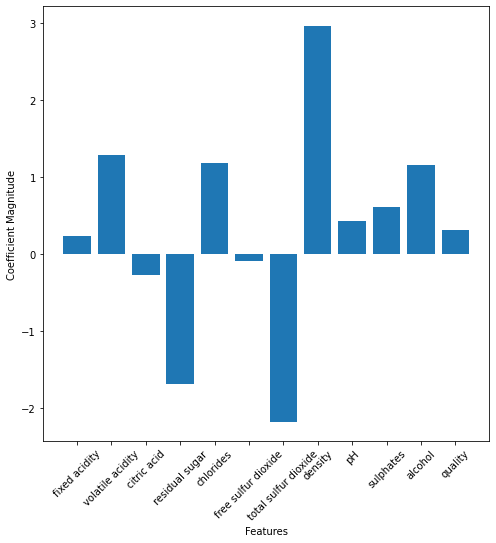

In [106]:
model = grid3.best_estimator_
names = list(x_train.columns)
values = model.coef_.tolist()[0]

plt.figure(figsize=(8,8))
plt.bar(names, values)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.title("")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

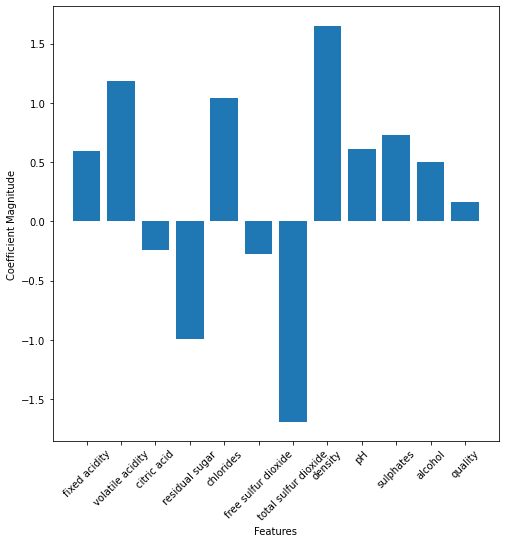

In [107]:
model = grid1.best_estimator_
names = list(x_train.columns)
values = model.coef_.tolist()[0]

plt.figure(figsize=(8,8))
plt.bar(names, values)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.title("")
plt.show